# ARTIFICIAL NEURAL NETWORK

### Type of Machine Learning
![towardsdatascience.com](https://miro.medium.com/max/602/0*-068ud_-o3ajwq_z.jpg)
https://towardsdatascience.com/what-are-the-types-of-machine-learning-e2b9e5d1756f

### Type of Supervised Machine Learning
![towardsdatascience.com](https://github.com/IALeMans/Meetup_ai-basics_2019-2/raw/master/classification_regression.png)
https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/machine_learning.html

## Problem Definition
Our objective is to build prediction model that predicts housing prices from a set of house features. We will use the Boston Housing dataset, which is collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive, and has been used extensively throughout the literature to benchmark algorithms

The dataset is small in size with only 506 cases. It contains 14 features described as follows:
* CRIM: per capita crime rate by town
* ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS: proportion of non-retail business acres per town.
* CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX: nitric oxides concentration (parts per 10 million)
* RM: average number of rooms per dwelling
* AGE: proportion of owner-occupied units built prior to 1940
* DIS: weighted distances to five Boston employment centres
* RAD: index of accessibility to radial highways
* TAX: full-value property-tax rate per \$10,000
* PTRATIO: pupil-teacher ratio by town
* B: 1000(Bk — 0.63)² where Bk is the proportion of blacks by town
* LSTAT: % lower status of the population
* MEDV: Median value of owner-occupied homes in $1000’s

The goal behind our regression problem is to use the 13 features to predict the value of MEDV (which represents the housing price).

https://www.marktechpost.com/2019/06/17/regression-with-keras-deep-learning-with-keras-part-3/

# Loading dataset

In [2]:
from keras.datasets import boston_housing
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [4]:
# let us view on sample from the features
print(X_train[0])
print(y_train[0])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


# Preprocessing

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# first we fit the scaler on the training dataset
scaler.fit(X_train)

# then we call the transform method to scale both the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# a sample output
print(X_train[0])
print(X_train_scaled[0])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]


### splitting is defined in training 

# Building the model

In [11]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=[X_train.shape[1]]))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

Keras supports other optimizers than RMSprop, and you are supposed to do a trial and error process to choose the best one for your problem. But normally RMSprop works fine with its default parameters.

The loss function used is the Mean Squared Error which is the average squared error a point is from the mean value. Keras supports other loss functions as well that are chosen based on the problem type.

The metrics shown here has nothing to do with the model training. It is just a user friendly value that is easier to evaluate than the main loss value. Example: an absolute value loss is easier for us to evaluate and make sense of than the squared error.

In [12]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100)


Train on 323 samples, validate on 81 samples
Epoch 1/100
323/323 [==============================] - 0s 836us/step - loss: 574.2183 - mae: 22.1108 - val_loss: 631.4651 - val_mae: 23.4120
Epoch 2/100
323/323 [==============================] - 0s 152us/step - loss: 561.1087 - mae: 21.7988 - val_loss: 616.9022 - val_mae: 23.1166
Epoch 3/100
323/323 [==============================] - 0s 111us/step - loss: 549.8235 - mae: 21.5263 - val_loss: 603.9234 - val_mae: 22.8454
Epoch 4/100
323/323 [==============================] - 0s 99us/step - loss: 539.2035 - mae: 21.2636 - val_loss: 590.2154 - val_mae: 22.5553
Epoch 5/100
323/323 [==============================] - 0s 112us/step - loss: 528.0121 - mae: 20.9886 - val_loss: 576.9058 - val_mae: 22.2707
Epoch 6/100
323/323 [==============================] - 0s 65us/step - loss: 516.6683 - mae: 20.7027 - val_loss: 562.9672 - val_mae: 21.9541
Epoch 7/100
323/323 [==============================] - 0s 178us/step - loss: 504.8863 - mae: 20.3907 - val_los

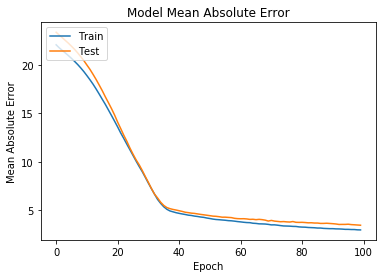

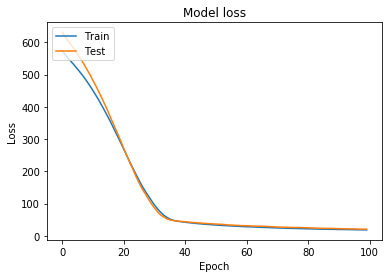

In [18]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model Mean Absolute Error')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluation on Test Data

In [17]:
model.evaluate(X_test_scaled, y_test)

102/102 [==============================] - 0s 110us/step


[21.253947538488053, 3.5775556564331055]

The output values represent the loss (Mean Squarred Error) and the metrics (Mean Absolute Error).

# Model Prediction

In [19]:
# we get a sample data (the first 2 inputs from the training data)
to_predict = X_train_scaled[:2]
# we call the predict method
predictions = model.predict(to_predict)

In [21]:
print(predictions)
print(y_train[:2])

[[14.975598]
 [39.328167]]
[15.2 42.3]
